## TODO: incluir medidas de demora de
- [x] Entrega de paquetes a la app del node 5 (delay)
- [x] cantidad de saltos utilizados por cada paquete (hopCount)
- [x] Utilización de los buffers de la red (Buffer Size)
- [] Utilización de los enlaces de la red

Entre otros que el alumno crea conveniente.

In [50]:
# FIXME: utilización de los recursos de la red (buffers y enlaces) se refiere a Buffer Size?
# Para la parte 2 seguro se utilizara link[1] por lo que habria que cambiar los graficos CREO

In [51]:
#Configuracion inicial
%matplotlib inline
import matplotlib.pyplot as plt #librería para graficas de python
import numpy # extiende las librerias de matemática de python
import pandas #libreria para procesamiento de datos muy usada en la industria
import seaborn # Extiende las funcionalidades de matplotlib, muy usado en data visualization
import os # librería para interactuar con el sistema de archivos 

# Con esto hacemos los gráficos más grandes, adecuados para el proyector.
seaborn.set_context(context='talk', font_scale=1.2)

#      [P1,P2]
data = [[],[]]
file_names = [[],[]]
for p in range(2):
    # Archivos
    dir = f'../DATA/Parte-{p+1}/'
    archivos = os.listdir(dir)

    # Ordeno los archivos para que queden simpre en orden:
    archivos.sort()

    # Cargamos los datos de los archivos en el array `data`
    # se mapea la info de cada parte m y caso n al arreglo de la posision m-1 en su posicion n-1
    for c in range(len(archivos)):
        aux = pandas.read_csv(dir + archivos[c])
        data[p].append(aux)

    print(f"\nParte {p+1}:")
    print("Archivos cargados: ",', '.join(archivos))
    
    for archivo in archivos:
        nombre = archivo.replace('.csv', '').replace('-', ' ')
        file_names[p].append(nombre)

    print("Nombres de archivos: ",', '.join(file_names[p]))

# NOTE: Variables globales
# nodes_number = data[0].loc[(data[0]['type'] == 'config') & (data[0]['attrname'] == 'Network.nodesNumber'), 'attrvalue'].tolist()
nodes_number = 8

# NOTE: Funciones auxiliares
# def put_time_values(minTimeList, maxTimeList): anda mal xd y ni se si usarla
#     '''
#     timeList1 y maxTimeList son listas de tiempos.
#     Si len(minTimeList) >= len(maxTimeList), entonces se retorna minTimeList.
#     Si len(minTimeList) < len(maxTimeList), entonces se retorna minTimeList extendida con sus 
#     valores repetidos segun los valores de maxTimeList tal que minTimeList[i] <= maxTimeList[i].
#     '''
#     ret = []
#     count = 0
#     while count < len(minTimeList) and minTimeList[count] > maxTimeList[0]:
#         count += 1
#     for i in range(len(maxTimeList)):
#         if count < len(minTimeList) and minTimeList[count] <= maxTimeList[i] :
#             ret.append(minTimeList[count])
#             count += 1
#         else:
#             ret.append(minTimeList[count-1])
#     return ret

# data[0][0]


Parte 1:
Archivos cargados:  Parte-1-Caso-1.csv, Parte-1-Caso-2.csv
Nombres de archivos:  Parte 1 Caso 1, Parte 1 Caso 2

Parte 2:
Archivos cargados:  Parte-2-Caso-init.csv
Nombres de archivos:  Parte 2 Caso init


## Cantidad de saltos utilizados por cada paquete
PD: Se cuentan al llegar a la app, osea al node 5. link 0

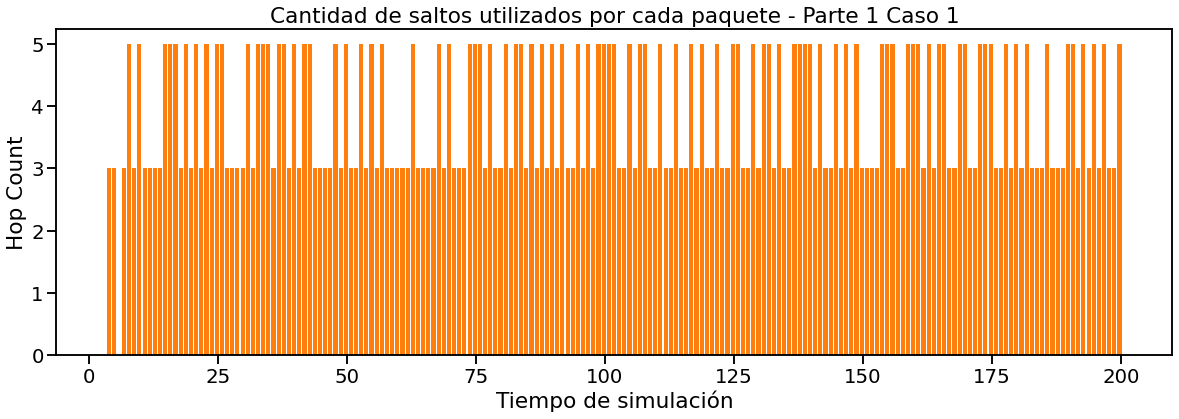

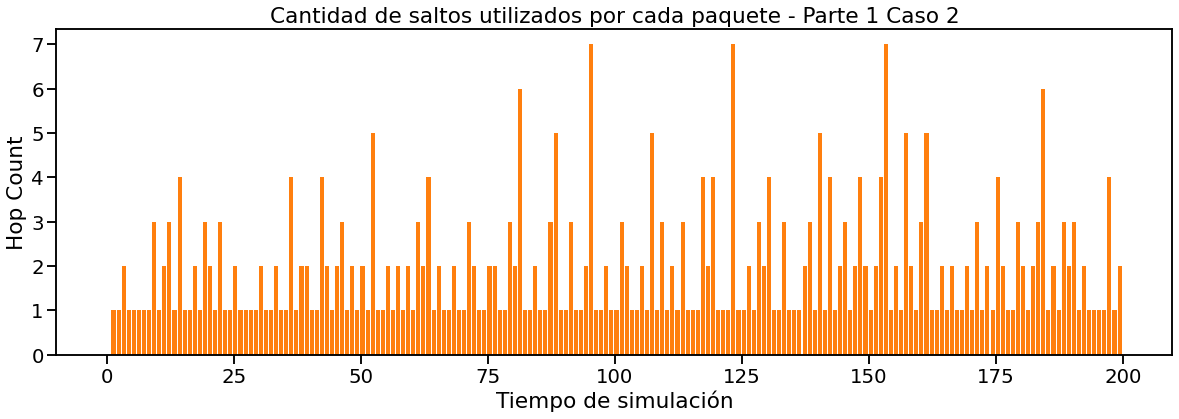

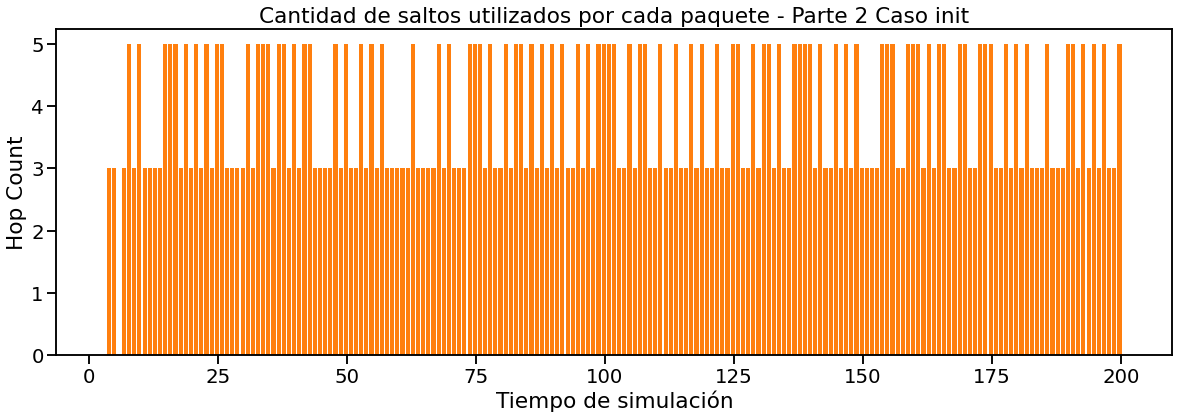

In [52]:
for p in range(2):
    parte = data[p]
    for c in range(len(parte)):
        caso = parte[c]

        # Extraemos los valores del vector de cada nodo en un array y lo guardamos en un array
        hopCount_time = caso.loc[(caso['module'] == 'Network.node[5].net') & (caso['name'] == 'hopCount'), 'vectime'].tolist()
        hopCount_value = caso.loc[(caso['module'] == 'Network.node[5].net') & (caso['name'] == 'hopCount'), 'vecvalue'].tolist()
        
        # convertimos los valores (ahora strings separados por comas) a listas para poder graficarlos
        hopCount_time = list(map(float,hopCount_time[0].split()))
        hopCount_value = list(map(float,hopCount_value[0].split()))
        
        # # Graficamos el gráfico de líneas
        # plt.figure(figsize=(20, 6))
        # plt.plot(hopCount_time, hopCount_value, color='tab:orange', label='Hop Count')
        # plt.title(f'Cantidad de saltos utilizados por cada paquete - {file_names[p][c]}')
        # plt.xlabel('Tiempo de simulación')
        # plt.ylabel('Hop Count')
        # plt.legend()
        # plt.show()
        
        # Graficamos el gráfico de barras
        plt.figure(figsize=(20, 6))
        plt.bar(hopCount_time, hopCount_value, color='tab:orange')#, label='Hop Count')
        plt.title(f'Cantidad de saltos utilizados por cada paquete - {file_names[p][c]}')
        plt.xlabel('Tiempo de simulación')
        plt.ylabel('Hop Count')
        # plt.xticks(hopCount_time)
        # plt.yticks(hopCount_value)
        # plt.legend()
        plt.show()

## Entrega de paquetes a la app del node 5

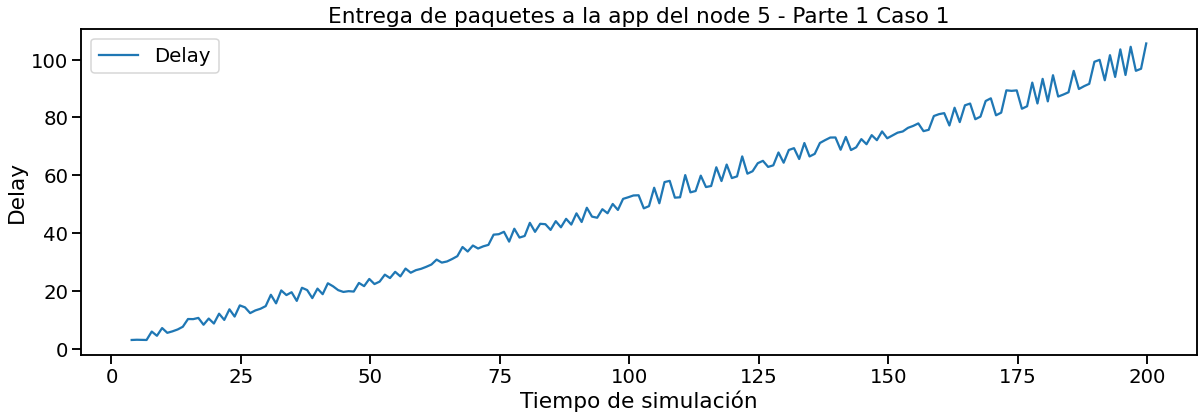

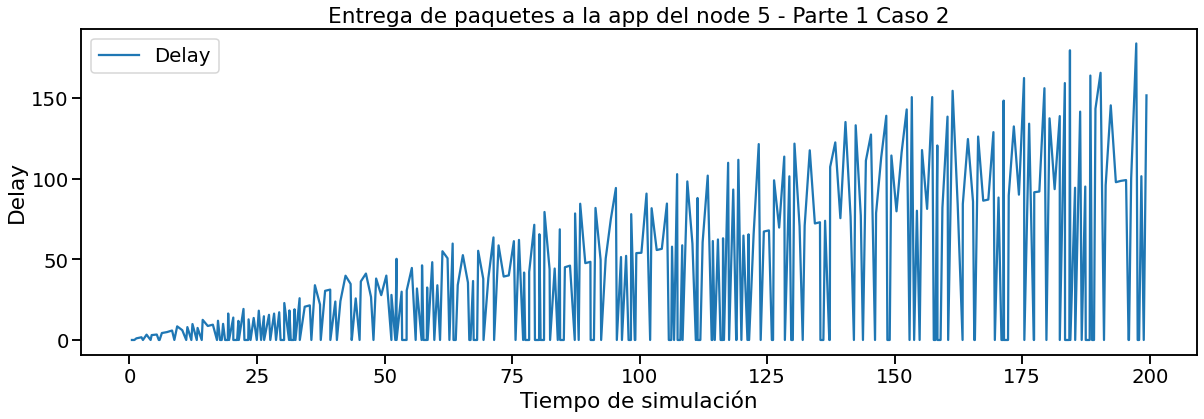

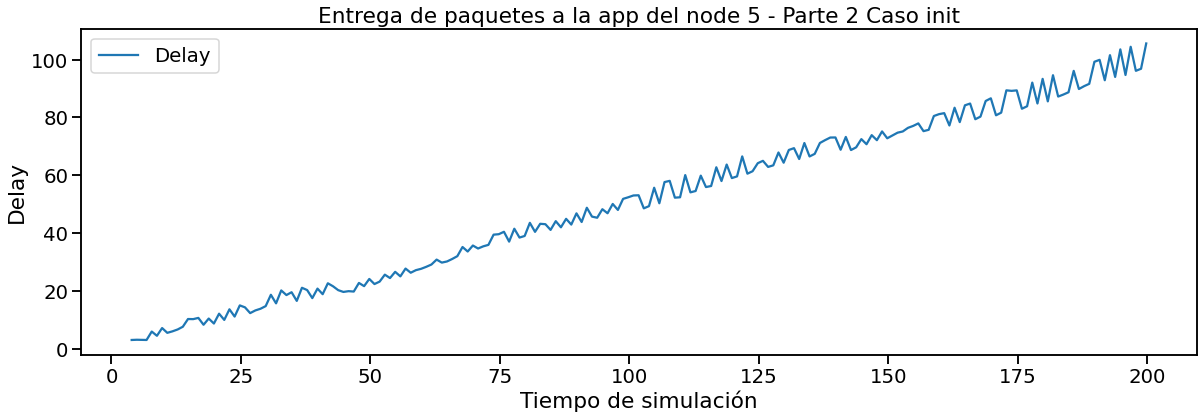

In [53]:
for p in range(2):
    parte = data[p]
    for c in range(len(parte)):
        caso = parte[c]

        # Extraemos los valores del vector de cada nodo en un array y lo guardamos en un array
        delayToNode5_time = caso.loc[(caso['module'] == 'Network.node[5].app') & (caso['name'] == 'Delay'), 'vectime'].tolist()
        delayToNode5_value = caso.loc[(caso['module'] == 'Network.node[5].app') & (caso['name'] == 'Delay'), 'vecvalue'].tolist()
        
        # convertimos los valores (ahora strings separados por comas) a listas para poder graficarlos
        delayToNode5_time = list(map(float,delayToNode5_time[0].split()))
        delayToNode5_value = list(map(float,delayToNode5_value[0].split()))
        
        # Graficamos el gráfico de líneas
        plt.figure(figsize=(20, 6))
        plt.plot(delayToNode5_time, delayToNode5_value, color='tab:blue', label='Delay')
        plt.title(f'Entrega de paquetes a la app del node 5 - {file_names[p][c]}')
        plt.xlabel('Tiempo de simulación')
        plt.ylabel('Delay')
        plt.legend()
        plt.show()

## Utilización de los buffers de la red

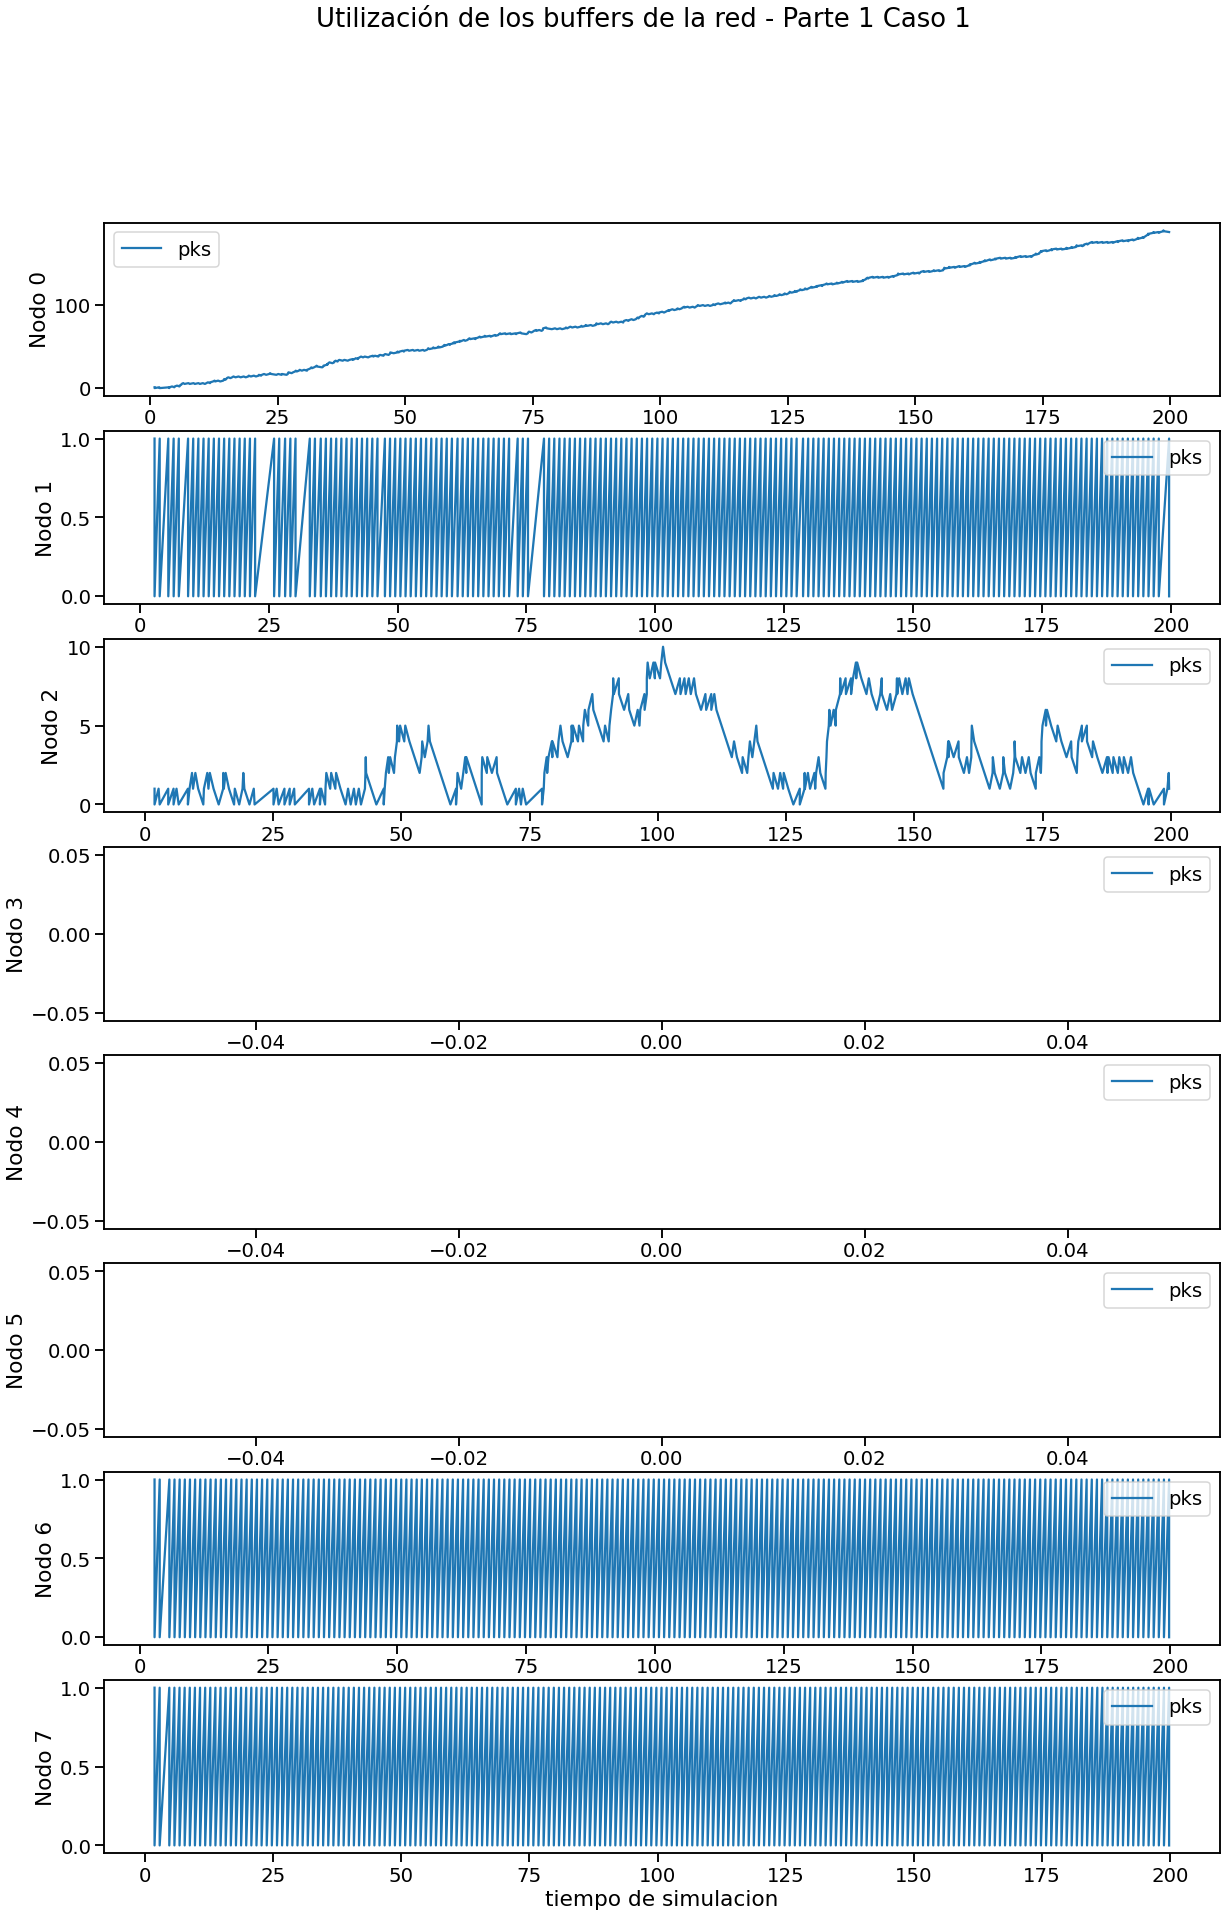

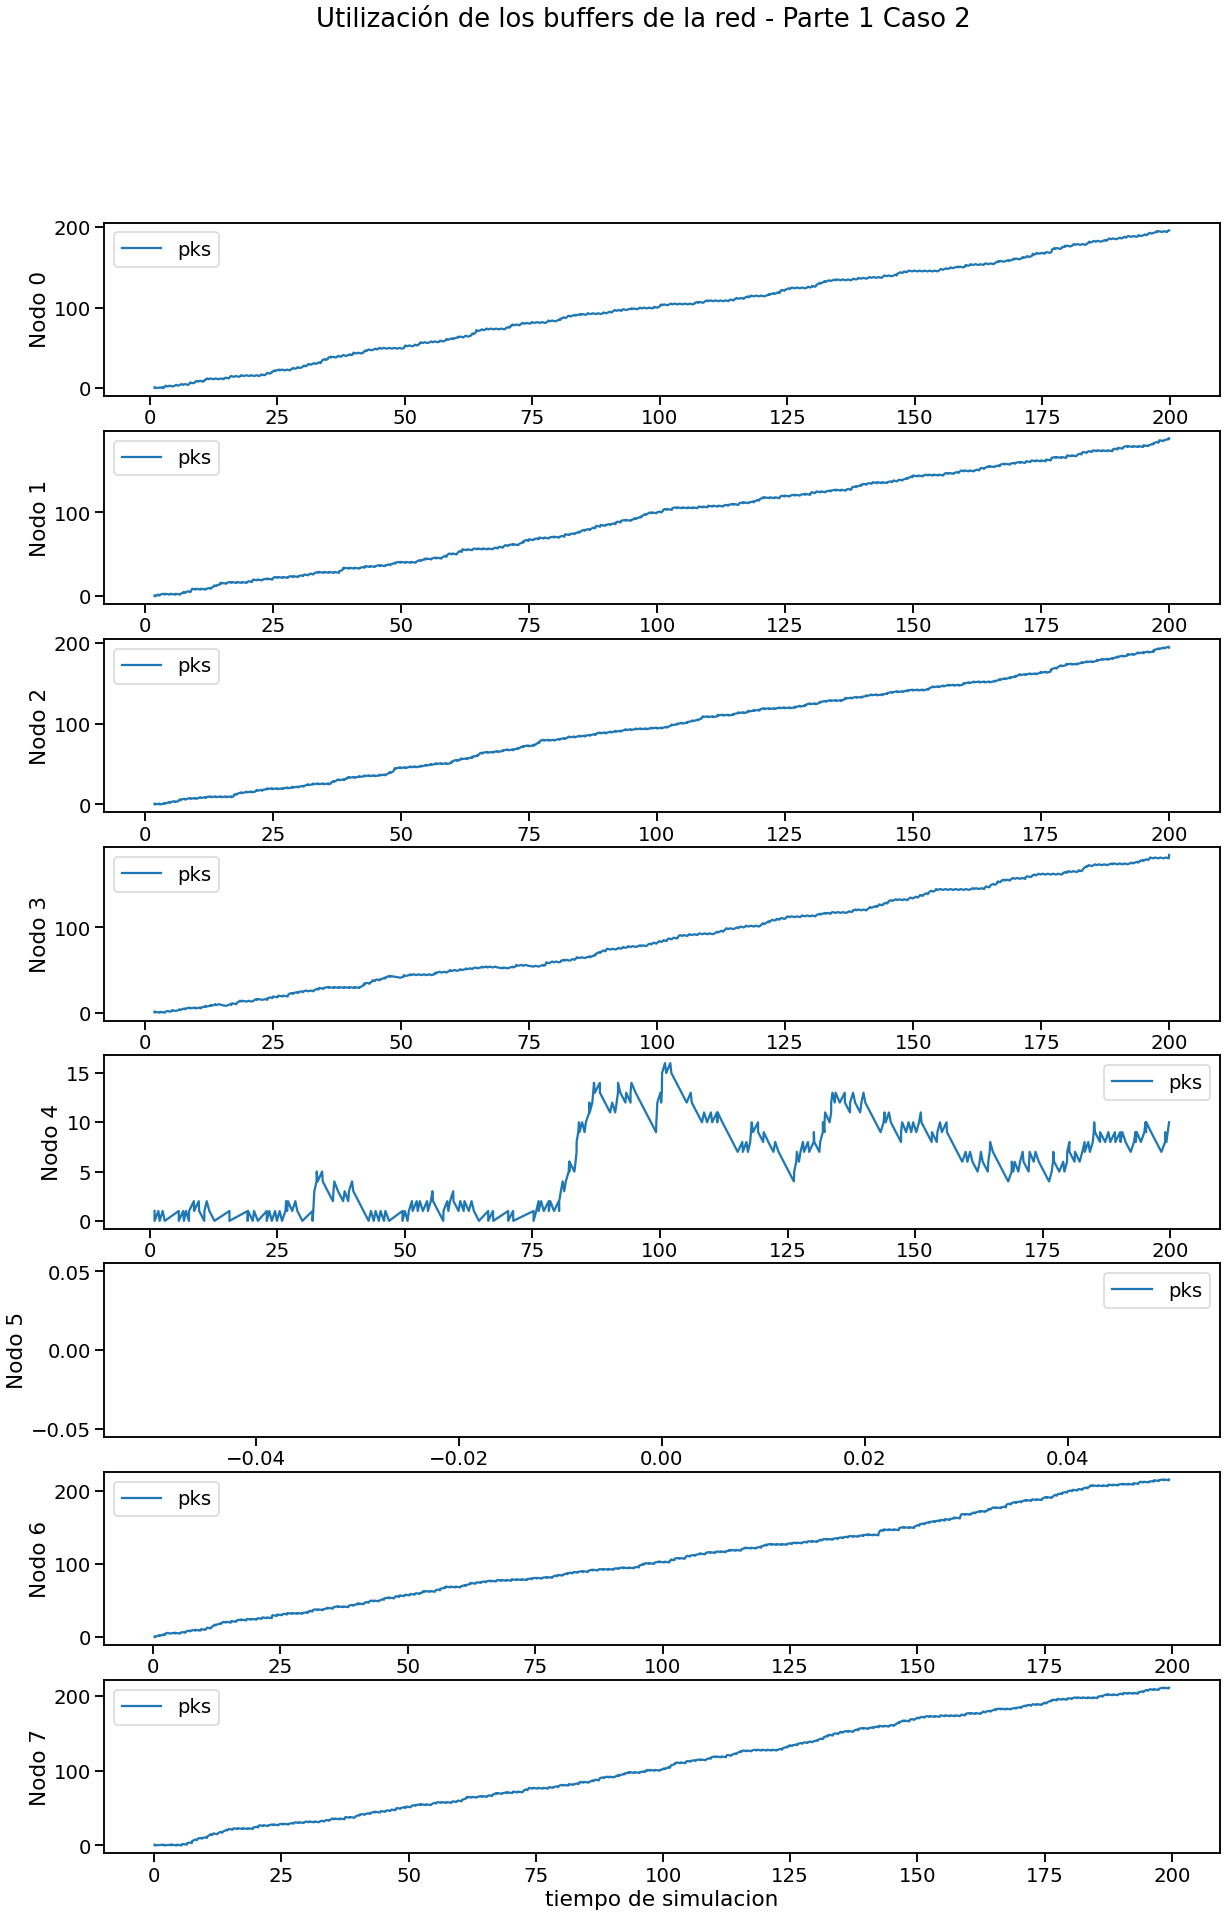

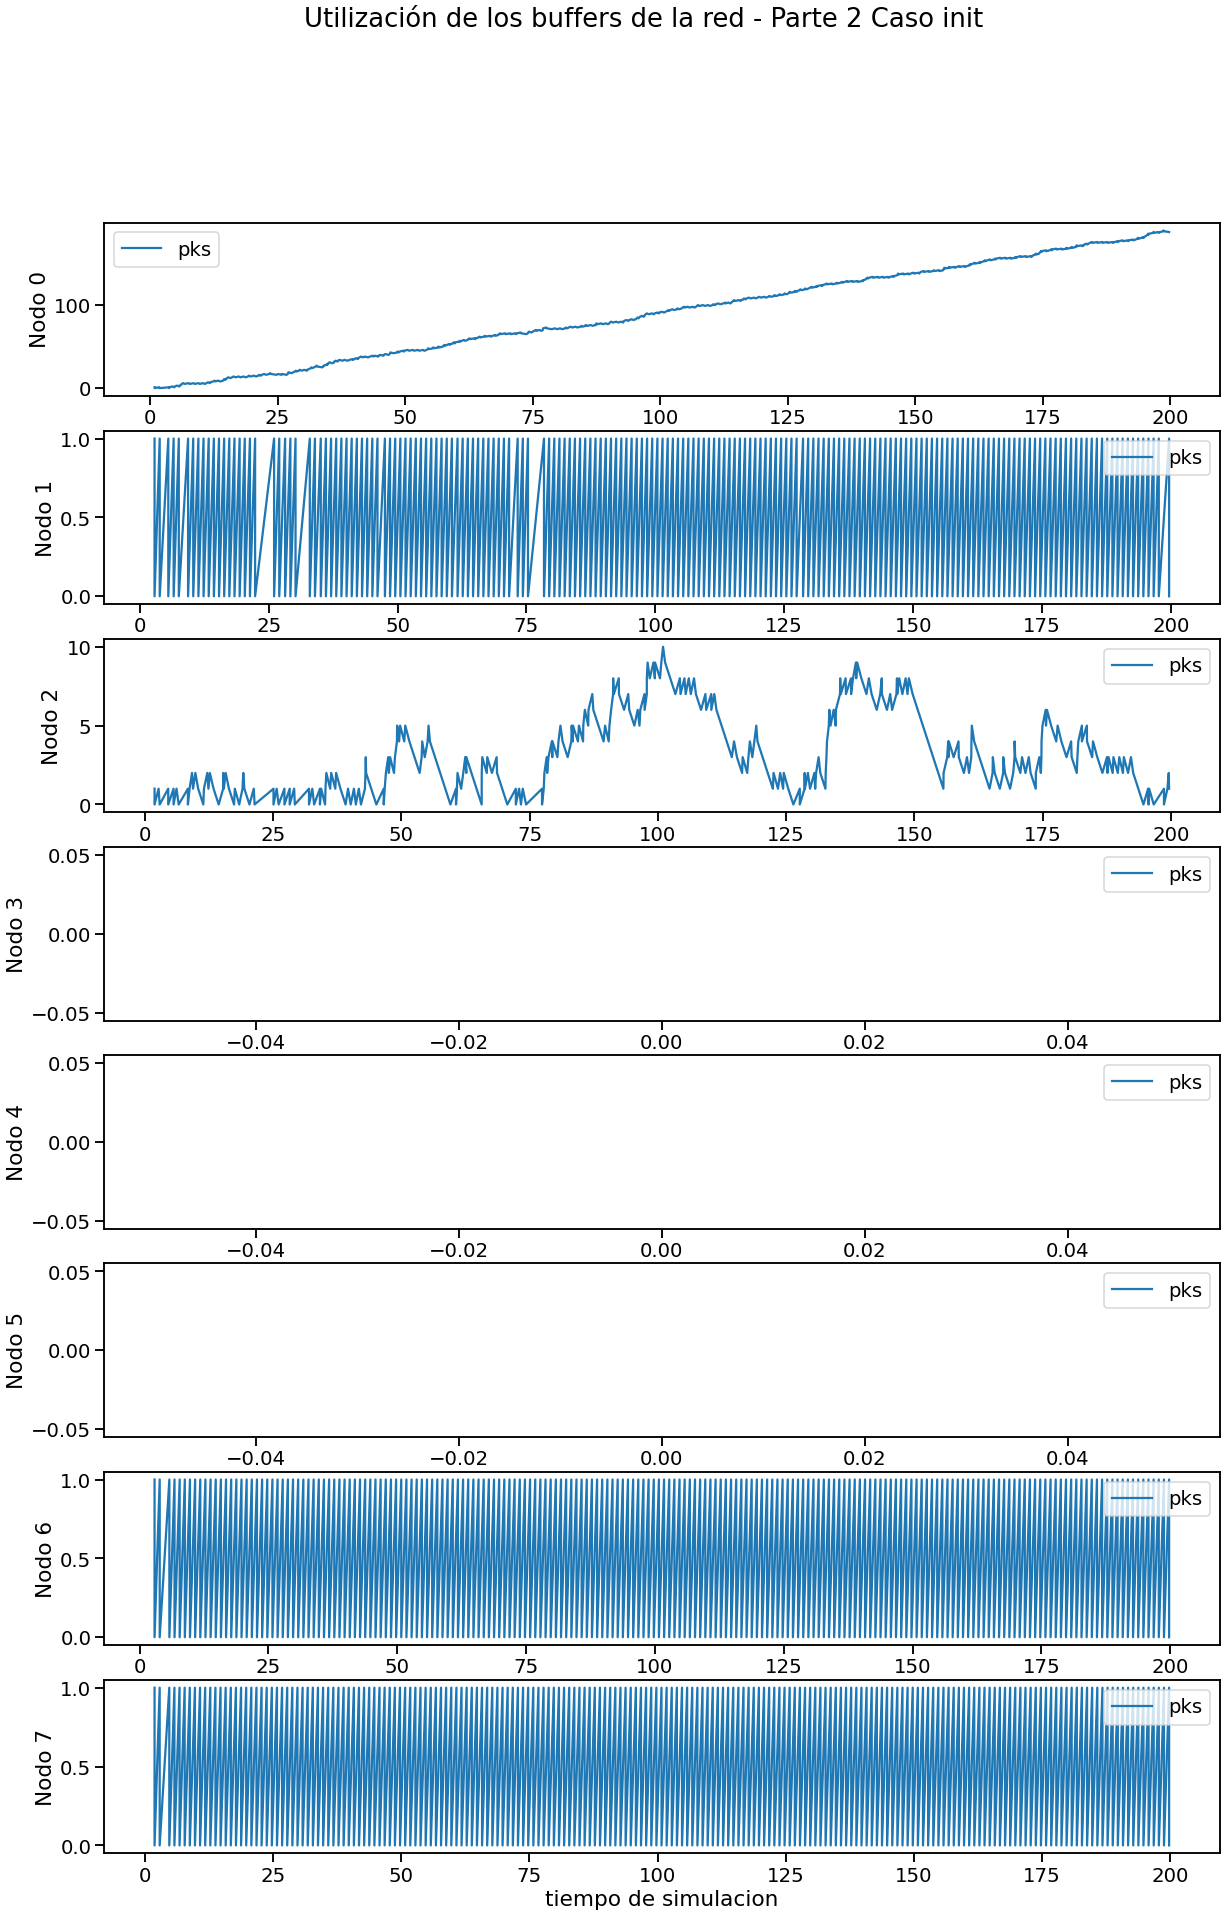

In [54]:
for p in range(2):
    parte = data[p]
    for c in range(len(parte)):
        caso = parte[c]

        # Extraemos los valores del vector de cada nodo en un array y lo guardamos en un array
        time_node = [0] * nodes_number
        buffer_node = [0] * nodes_number
        for i in range(nodes_number):
            time_node[i] = caso.loc[(caso['module'] == f'Network.node[{i}].lnk[0]') & (caso['name'] == 'Buffer Size'), 'vectime'].tolist()
            buffer_node[i] = caso.loc[(caso['module'] == f'Network.node[{i}].lnk[0]') & (caso['name'] == 'Buffer Size'), 'vecvalue'].tolist()
            
            # convertimos los valores (ahora strings separados por comas) a listas para poder graficarlos
            time_node[i] = list(map(float,time_node[i][0].split())) if time_node[i] else [0]
            buffer_node[i] = list(map(float,buffer_node[i][0].split())) if buffer_node[i] else [0]

        # Graficamos
        fig, ax = plt.subplots(nodes_number,figsize=(20, 30))
        fig.suptitle(f'Utilización de los buffers de la red - {file_names[p][c]}')
        plt.xlabel("tiempo de simulacion")
        #
        for i in range(nodes_number):
            ax[i].plot(time_node[i],buffer_node[i], label="pks")
            ax[i].set_ylabel(f"Nodo {i}")
            ax[i].legend()
        plt.show